In [1]:
import lichess.api
from lichess.format import PGN, SINGLE_PGN, PYCHESS
from io import *
import os
import glob
import pandas as pd
import numpy as np
import datetime
import berserk
import rpy2
import warnings
warnings.filterwarnings("ignore")
#Import required libraries

In [2]:
client = berserk.Client()
usuario = input('Insert username: ')

Insert username:  santificex


In [3]:
user = lichess.api.user(usuario)
pgn = lichess.api.user_games(usuario,max=100, format=SINGLE_PGN)

#print(pgn)

In [4]:
games=open("games.txt","w+")
games.write(pgn)
games.close()
file=open('games.txt',"r",encoding="utf8") #read pgn
lines=file.readlines() #extract each line of the pgn
consol=open("chess_stats.txt","w+") #Create new txt doc to dump the processed info
i=0 #start at 0
for line in range(len(lines)): #start loop
	try:
		if str(lines[i+14]).replace('\n','') == '': #write lines if game has no elo difference
			try:
				consol.write(str(lines[i]).replace('\n',',')+str(lines[i+1]).replace('\n',',')+str(lines[i+2]).replace('\n',',')+
				str(lines[i+3]).replace('\n',',')+
				str(lines[i+4]).replace('\n',',')+str(lines[i+5]).replace('\n',',')+
				str(lines[i+6]).replace('\n',',')+str(lines[i+7]).replace('\n',',')+str(lines[i+8]).replace('\n',',')+
				str(lines[i+9]).replace('\n',',')+str(lines[i+10]).replace('\n',',')+str(lines[i+11]).replace('\n',',')+
				str(lines[i+12]).replace('\n',',')+str(lines[i+13]).replace('\n',',')+str(lines[i+14]).replace('\n',',')+
				','+','+str(lines[i+15]).replace('\n',',')+','+','+'\n')
				i+=18
			except:
				pass
			finally:
				pass
		else: #write lines if game has elo difference
			try:
				consol.write(str(lines[i]).replace('\n',',')+str(lines[i+1]).replace('\n',',')+str(lines[i+2]).replace('\n',',')+
				str(lines[i+3]).replace('\n',',')+
				str(lines[i+4]).replace('\n',',')+str(lines[i+5]).replace('\n',',')+
				str(lines[i+6]).replace('\n',',')+str(lines[i+7]).replace('\n',',')+str(lines[i+8]).replace('\n',',')+
				str(lines[i+9]).replace('\n',',')+str(lines[i+10]).replace('\n',',')+str(lines[i+11]).replace('\n',',')+
				str(lines[i+12]).replace('\n',',')+str(lines[i+13]).replace('\n',',')+str(lines[i+14]).replace('\n',',')+
				str(lines[i+15]).replace('\n',',')+str(lines[i+16]).replace('\n',',')+str(lines[i+17]).replace('\n',',')+
				str(lines[i+18]).replace('\n',',')+str(lines[i+19]).replace('\n',',')+'\n')
				i+=20
			except:
				pass
			finally:
				pass
	except:
		pass
	finally:
		pass
consol.close()
file.close()
os.remove('games.txt')

In [5]:
openings=pd.DataFrame({'ECO':['A00','A01','A02','A03','A04','A05','A06','A07','A08','A09',
                              'A10','A11','A12','A13','A14','A15','A16','A17','A18','A19',
                              'A20','A21','A22','A23','A24','A25','A26','A27','A28','A29',
                              'A30','A31','A32','A33','A34','A35','A36','A37','A38','A39',
                              'A40','A41','A42','A43','A44','A45','A46','A47','A48','A49',
                              'A50','A51','A52','A53','A54','A55','A56','A57','A58','A59',
                              'A60','A61','A62','A63','A64','A65','A66','A67','A68','A69',
                              'A70','A71','A72','A73','A74','A75','A76','A77','A78','A79','A80','A81','A82','A83','A84','A85','A86','A87','A88','A89','A90','A91','A92','A93','A94','A95','A96','A97','A98','A99','B00','B01','B02','B03','B04','B05','B06','B07','B08','B09','B10','B11','B12','B13','B14','B15','B16','B17','B18','B19','B20','B21','B22','B23','B24','B25','B26','B27','B28','B29','B30','B31','B32','B33','B34','B35','B36','B37','B38','B39','B40','B41','B42','B43','B44','B45','B46','B47','B48','B49','B50','B51','B52','B53','B54','B55','B56','B57','B58','B59','B60','B61','B62','B63','B64','B65','B66','B67','B68','B69','B70','B71','B72','B73','B74','B75','B76','B77','B78','B79','B80','B81','B82','B83','B84','B85','B86','B87','B88','B89','B90','B91','B92','B93','B94','B95','B96','B97','B98','B99','C00','C01','C02','C03','C04','C05','C06','C07','C08','C09','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27','C28','C29','C30','C31','C32','C33','C34','C35','C36','C37','C38','C39','C40','C41','C42','C43','C44','C45','C46','C47','C48','C49','C50','C51','C52','C53','C54','C55','C56','C57','C58','C59','C60','C61','C62','C63','C64','C65','C66','C67','C68','C69','C70','C71','C72','C73','C74','C75','C76','C77','C78','C79','C80','C81','C82','C83','C84','C85','C86','C87','C88','C89','C90','C91','C92','C93','C94','C95','C96','C97','C98','C99','D00','D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31','D32','D33','D34','D35','D36','D37','D38','D39','D40','D41','D42','D43','D44','D45','D46','D47','D48','D49','D50','D51','D52','D53','D54','D55','D56','D57','D58','D59','D60','D61','D62','D63','D64','D65','D66','D67','D68','D69','D70','D71','D72','D73','D74','D75','D76','D77','D78','D79','D80','D81','D82','D83','D84','D85','D86','D87','D88','D89','D90','D91','D92','D93','D94','D95','D96','D97','D98','D99','E00','E01','E02','E03','E04','E05','E06','E07','E08','E09','E10','E11','E12','E13','E14','E15','E16','E17','E18','E19','E20','E21','E22','E23','E24','E25','E26','E27','E28','E29','E30','E31','E32','E33','E34','E35','E36','E37','E38','E39','E40','E41','E42','E43','E44','E45','E46','E47','E48','E49','E50','E51','E52','E53','E54','E55','E56','E57','E58','E59','E60','E61','E62','E63','E64','E65','E66','E67','E68','E69','E70','E71','E72','E73','E74','E75','E76','E77','E78','E79','E80','E81','E82','E83','E84','E85','E86','E87','E88','E89','E90','E91','E92','E93','E94','E95','E96','E97','E98','E99'],
                      'Opening':["Start position","Nimzowitsch-Larsen Attack","Bird  1.f4",
                                 "Bird: 1...d5","Reti  1.Nf3","Reti: 1...Nf6","Reti: 1...d5",
                                 "Reti: KIA","Reti: KIA 2...c5","Reti: 2.c4","English  1.c4",
                                 "English: Caro-Kann Defence","English: Caro-Kann Defence",
                                 "English: 1...e6","English: Neo-Catalan Declined","English: Anglo-Indian",
                                 "English: Anglo-Indian 2.Nc3","English: Anglo-Indian 2.Nc3","English: Mikenas","English: Mikenas Sicilian","English: King's (1...e5)","English: King's 2.Nc3","English: King's 2.Nc3","English: Bremen Keres","English: Bremen 3...g6","English: Closed","English: Closed 5.d3","English: Three Knights","English: Four Knights","English: Four Knights","English: Symmetrical","English: Symmetrical","English: Symmetrical","English: Symmetrical","English: Symmetrical","English: Symmetrical","English: Symmetrical 3.g3","English: Symmetrical 5.Nf3","English: Symmetrical","English: Symmetrical","Queen's Pawn Game","Neo-Old Indian","Modern: Averbakh","Old Benoni","Old Benoni: Czech","Queen's Pawn: Indian","Indian: 2.Nf3","Neo-Queen's Indian","Neo-King's Indian","Neo-King's Indian: Fianchetto","Indian: 2.c4","Budapest  1.d4","Budapest: 3...Ng4","Old Indian","Old Indian: 4.Nf3","Old Indian: 5.e4","Benoni: 2...c5","Benko Gambit","Benko Gambit: 5.bxa6","Benko Gambit: 7.e4","Benoni: 3.d5 e6","Benoni: 6.Nf3 g6","Benoni: Fianchetto 8.Bg2","Benoni: Fianchetto 9...Nbd7","Benoni: Fianchetto 11...Re8","Benoni: 6.e4","Benoni: Four Pawns","Benoni: Four Pawns","Benoni: Four Pawns","Benoni: Four Pawns","Benoni: Classical","Benoni: Classical 8.Bg5","Benoni: Classical 8.Be2","Benoni: Classical 9.O-O","Benoni: Classical 9.O-O","Benoni: Classical 9.O-O","Benoni: Classical Main","Benoni: Classical Main","Benoni: Classical Main","Benoni: Classical Main","Dutch  1.d4","Dutch: 2.g3","Dutch: Staunton Gambit","Dutch: Staunton Gambit","Dutch: 2.c4","Dutch: 2.c4 Nf6","Dutch: 2.c4 Nf6","Dutch: Leningrad Main","Dutch: Leningrad Main","Dutch: Leningrad Main","Dutch: 2.c4 Nf6","Dutch: 2.c4 Nf6","Dutch: 2.c4 Nf6","Dutch: Stonewall Botvinnik","Dutch: Stonewall Botvinnik","Dutch: Stonewall 7.Nc3","Dutch: Classical","Dutch: Ilyin-Zhenevsky Variation","Dutch: Ilyin-Zhenevsky 8.Qc2","Dutch: Ilyin-Zhenevsky 8.b3","King's Pawn","Scandinavian (Centre Counter)","Alekhine Defence","Alekhine: 3.d4","Alekhine: Modern Variation","Alekhine: Modern 4...Bg4","Modern  1.e4","Pirc  1.e4","Pirc: Classical","Pirc: Austrian Attack","Caro-Kann  1.e4","Caro-Kann: Two Knights","Caro-Kann: 2.d4","Caro-Kann: Exchange Variation","Caro-Kann: Panov-Botvinnik 5...g6","Caro-Kann: 3.Nc3","Caro-Kann: Bronstein-Larsen","Caro-Kann: Steinitz Variation","Caro-Kann: Classical","Caro-Kann: Classical 7.Nf3","Sicilian Defence","Sicilian: Grand Prix","Sicilian: Alapin","Sicilian: Closed","Sicilian: Closed 3.g3","Sicilian: Closed 3.g3","Sicilian: Closed 6.Be3","Sicilian: 2.Nf3","Sicilian: O'Kelly Variation","Sicilian: Nimzowitsch","Sicilian: 2...Nc6","Sicilian: Rossolimo 3...g6","Sicilian: 2...Nc6 3.d4","Sicilian: Open 2...Nc6","Sicilian: Accelerated Fianchetto","Sicilian: Accelerated Fianchetto","Sicilian: Maroczy Bind","Sicilian: Maroczy Bind","Sicilian: Maroczy Bind","Sicilian: Maroczy Bind","Sicilian: 2...e6","Sicilian: Kan (Paulsen)","Sicilian: Kan 5.Bd3","Sicilian: Kan 5.Nc3","Sicilian: Taimanov","Sicilian: Taimanov 5.Nc3","Sicilian: Taimanov 5...a6","Sicilian: Taimanov Bastrikov","Sicilian: Taimanov 6.Be3","Sicilian: Taimanov 6.Be3","Sicilian: 2.Nf3 d6","Sicilian: Moscow","Sicilian: Moscow 3...Bd7","Sicilian: 2...d6 3.d4","Sicilian: Open 2...d6","Sicilian: Prins Venice","Sicilian: Open 2...d6","Sicilian: Sozin","Sicilian: Boleslavsky Variation","Sicilian: Boleslavsky 7.Nb3","Sicilian: Richter-Rauzer","Sicilian: Richter-Rauzer Larsen","Sicilian: Richter-Rauzer 6...e6","Sicilian: Richter-Rauzer Rauzer","Sicilian: Richter-Rauzer 7.Qd2","Sicilian: Richter-Rauzer 7...Be7","Sicilian: Richter-Rauzer 7...a6","Sicilian: Richter-Rauzer 7...a6","Sicilian: Richter-Rauzer 7...a6","Sicilian: Richter-Rauzer 7...a6","Sicilian: Dragon","Sicilian: Dragon Levenfish","Sicilian: Dragon 6.Be3","Sicilian: Dragon Classical","Sicilian: Dragon Classical","Sicilian: Dragon Yugoslav","Sicilian: Dragon Yugoslav","Sicilian: Dragon Yugoslav","Sicilian: Dragon Yugoslav","Sicilian: Dragon Yugoslav","Sicilian: Scheveningen","Sicilian: Scheveningen Keres","Sicilian: Scheveningen 6.f4","Sicilian: Scheveningen 6.Be2","Sicilian: Scheveningen Classical","Sicilian: Scheveningen Classical","Sicilian: Sozin-Scheveningen","Sicilian: Sozin-Najdorf 7.Bb3","Sicilian: Sozin-Scheveningen","Sicilian: Sozin 7.Be3","Sicilian: Najdorf","Sicilian: Najdorf 6.g3","Sicilian: Najdorf 6.Be2","Sicilian: Najdorf 6.f4","Sicilian: Najdorf 6.Bg5","Sicilian: Najdorf 6...e6","Sicilian: Najdorf 7.f4","Sicilian: Najdorf Poisoned","Sicilian: Najdorf 7...Be7","Sicilian: Najdorf Main","French  1.e4","French: Exchange","French: Advance","French: Tarrasch","French: Tarrasch Guimard","French: Tarrasch Closed","French: Tarrasch Closed","French: Tarrasch Open","French: Tarrasch Open","French: Tarrasch Open","French: 3.Nc3","French: 3.Nc3 Nf6","French: MacCutcheon","French: Classical","French: Classical 6.Bxe7","French: Winawer","French: Winawer Advance","French: Winawer Advance","French: Winawer 5...Bxc3+","French: Winawer Smyslov","Open Game","Centre Game","Centre Game","Bishop's Opening","Bishop's Opening: Berlin","Vienna Game","Vienna: 2...Nf6","Vienna: 3.Bc4 Nxe4","Vienna: 3.Bc4 Nc6","Vienna Gambit","King's Gambit","KGD: Falkbeer Countergambit","KGD: Falkbeer 4.d3","King's Gambit Accepted","KGA: King's Knight","KGA: Cunningham Defence","KGA: Scandinavian (Abbazia)","KGA: 3.Nf3 g5","KGA: 3.Nf3 g5","KGA: 3.Nf3 g5","Open Game","Philidor Defence","Russian Game (Petroff","Russian Game: Modern","Open Game","Scotch: 4.Nxd4","Three Knights Game","Four Knights Game","Four Knights: Spanish","Four Knights: 4.Bb5","Italian Game","Evans Gambit","Evans Gambit: 5...Ba5","Giuoco Piano: 4.c3","Giuoco Piano: 4.c3","Two Knights Defence","Two Knights: Classical","Two Knights: 4.Ng5","Two Knights: Morphy","Two Knights: Morphy","Spanish (Ruy Lopez)","Spanish: Bird's Defence","Spanish: Old Steinitz","Spanish: Schliemann (Jaenisch)","Spanish: Classical Defence","Spanish: Berlin Defence","Spanish: Closed Berlin","Spanish: Open Berlin","Spanish: 3...a6","Spanish: Exchange Gligoric","Spanish: 4.Ba4","Spanish: Modern Steinitz","Spanish: Modern Steinitz","Spanish: Modern Steinitz","Spanish: Modern Steinitz","Spanish: Modern Steinitz","Spanish: Modern Steinitz","Spanish: Morphy Defence","Spanish: 5.O-O","Spanish: Steinitz Deferred","Spanish: Open","Spanish: Open Keres","Spanish: Open 9.c3","Spanish: Open Classical","Spanish: Closed System","Spanish: Closed Exchange","Spanish: Worrall Attack","Spanish: Closed 6.Re1","Spanish: Closed 6...b5","Spanish: Marshall Counterattack","Spanish: Closed 8...d6","Spanish: Closed 9.d4","Spanish: Closed 9.h3","Spanish: Closed Smyslov","Spanish: Closed Breyer","Spanish: Closed Breyer","Spanish: Closed Chigorin","Spanish: Closed Chigorin","Spanish: Closed Chigorin","Spanish: Closed Chigorin","Queen's Pawn Game","Richter-Veresov Attack","Queen's Pawn: 2.Nf3","Torre Attack (Tartakower)","Queen's Pawn: Colle","Colle: 3...e6","Queen's Gambit","QGD: Chigorin Defence","QGD: Albin Countergambit","QGD: Albin 5.g3","Slav Defence","Slav: 3.Nf3","Slav: 4.e3 Bf5","Slav: Exchange","Slav: Exchange 6.Bf4","Slav: 4.Nc3","Slav: Alapin","Slav: Czech Defence","Slav: Dutch Variation","Slav: Dutch 8...O-O","Queen's Gambit Accepted","QGA: 3.Nf3","QGA: Alekhine 4.e3","QGA: 3.Nf3 Nf6","QGA: 4.Nc3","QGA: 4.e3","QGA: 4.e3 e6","QGA: Classical 6...a6","QGA: Classical 7.Qe2","QGA: Classical 8...Bb7","Queen's Gambit Declined","QGD: 3.Nc3","QGD Tarrasch","QGD Tarrasch: 6.g3","QGD Tarrasch: 7.Bg2","QGD: 3.Nc3 Nf6","QGD: Exchange 5.Bg5","QGD: 4.Nf3","QGD: Ragozin","QGD: Ragozin Vienna","QGD: Semi-Tarrasch","QGD: Semi-Tarrasch 5.cxd5","QGD: Semi-Tarrasch 6.e3","Semi-Slav  1.d4","Semi-Slav: Botvinnik Accepted","Semi-Slav: 5.e3","Semi-Slav: 6.Bd3","Semi-Slav: Meran Variation","Semi-Slav: Meran 8...a6","Semi-Slav: Meran Blumenfeld","QGD: 4.Bg5","QGD: 4.Bg5 Nbd7","QGD: 4.Bg5 Nbd7","QGD: 4.Bg5 Be7","QGD: Anti-Neo-Orthodox Variation","QGD: 6.Nf3","QGD: Neo-Orthodox 7.Bh4","QGD: Lasker Defence","QGD: Tartakower System","QGD: Tartakower 8.cxd5","QGD: Orthodox Defence","QGD: Orthodox Rubinstein","QGD: Orthodox Rubinstein","QGD: Orthodox 7.Rc1","QGD: Orthodox Rubinstein","QGD: Orthodox Rubinstein","QGD: Orthodox Main","QGD: Orthodox Main","QGD: Orthodox Classical","QGD: Orthodox Classical","Neo-Gruenfeld: 3.Nf3 d5","Neo-Gruenfeld 5.cxd5 Nxd5","Neo-Gruenfeld 5.cxd5 Nxd5","Neo-Gruenfeld 5.Nf3","Neo-Gruenfeld 6.cxd5 Nxd5","Neo-Gruenfeld 6.cxd5 Nxd5","Neo-Gruenfeld 6.cxd5 Nxd5","Neo-Gruenfeld 6.O-O","Neo-Gruenfeld 6.O-O c6","Neo-Gruenfeld 6.O-O c6","Gruenfeld Defence","Gruenfeld: Early Russian","Gruenfeld: 4.Bf4","Gruenfeld: Gruenfeld Gambit","Gruenfeld: Gruenfeld Gambit","Gruenfeld: Exchange Variation","Gruenfeld: Classical Exchange","Gruenfeld: Classical Exchange","Gruenfeld: Classical Exchange","Gruenfeld: Classical Exchange","Gruenfeld: Three Knights","Gruenfeld: 5.Bg5","Gruenfeld: 5.Bf4","Gruenfeld: 5.Bf4 O-O","Gruenfeld: 5.e3","Gruenfeld: 5.e3 O-O","Gruenfeld: Russian Variation","Gruenfeld: Russian 7.e4","Gruenfeld: Russian Smyslov","Gruenfeld: Russian Smyslov","Queen's Pawn: Neo-Indian","Catalan: 4.Bg2","Catalan: Open 5.Qa4+","Catalan: Open 5.Qa4+","Catalan: Open 5.Nf3","Catalan: Open Classical","Catalan: Closed","Catalan: Closed 6...Nbd7","Catalan: Closed 7.Qc2","Catalan: Closed Main","Neo-Indian: 3.Nf3","Bogo-Indian  1.d4","Queen's Indian","Queen's Indian: 5.Bg5","Queen's Indian: 4.e3","Queen's Indian: 4.g3","Queen's Indian: Capablanca","Queen's Indian: 5.Bg2","Queen's Indian: 7.Nc3","Queen's Indian: Old","Nimzo-Indian Defence","Nimzo-Indian: Three Knights","Nimzo-Indian: Spielmann Variation","Nimzo-Indian: Spielmann 4...c5","Nimzo-Indian: Saemisch","Nimzo-Indian: Saemisch 5...c5","Nimzo-Indian: Saemisch 5...c5","Nimzo-Indian: Saemisch 5...O-O","Nimzo-Indian: Saemisch 5...O-O","Nimzo-Indian: Saemisch 5...O-O","Nimzo-Indian: Leningrad","Nimzo-Indian: Leningrad Main","Nimzo-Indian: Classical Variation","Nimzo-Indian: Classical 4...Nc6","Nimzo-Indian: Classical Noa","Nimzo-Indian: Classical Noa","Nimzo-Indian: Classical Noa","Nimzo-Indian: Classical Noa","Nimzo-Indian: Classical 4...c5","Nimzo-Indian: Classical Pirc","Nimzo-Indian: Rubinstein","Nimzo-Indian: 4.e3 c5","Nimzo-Indian: 4.e3 c5","Nimzo-Indian: Nimzowitsch (Fischer)","Nimzo-Indian: Nimzowitsch 5.Ne2","Nimzo-Indian: Nimzowitsch 5.Ne2","Nimzo-Indian: 4.e3 O-O","Nimzo-Indian: 4.e3 O-O","Nimzo-Indian: 4.e3 O-O","Nimzo-Indian: Botvinnik System","Nimzo-Indian: 4.e3 O-O","Nimzo-Indian: 4.e3 O-O","Nimzo-Indian: Main Line","Nimzo-Indian: Main Line","Nimzo-Indian: Main Line","Nimzo-Indian: Main Line","Nimzo-Indian: Main Line","Nimzo-Indian: Main Line","Nimzo-Indian: Main Line","Nimzo-Indian: Main Line","King's Indian","King's Indian: 3.Nc3","King's Indian: Fianchetto","King's Indian: Fianchetto","King's Indian: Fianchetto","King's Indian: Fianchetto","King's Indian: Fianchetto","King's Indian: Fianchetto","King's Indian: Fianchetto","King's Indian: Fianchetto","King's Indian: 4.e4","King's Indian: Makagonov","King's Indian: 4.e4","King's Indian: 5.Be2","King's Indian: Averbakh","King's Indian: Averbakh","King's Indian: Four","King's Indian: Four","King's Indian: Four","King's Indian: Four","King's Indian: Saemisch","King's Indian: Saemisch","King's Indian: Saemisch","King's Indian: Saemisch","King's Indian: Saemisch","King's Indian: Saemisch","King's Indian: Saemisch","King's Indian: Saemisch","King's Indian: Saemisch","King's Indian: Saemisch","King's Indian: 5.Nf3","King's Indian: 6.Be2","King's Indian: 6.Be2","King's Indian: Petrosian","King's Indian: 7.O-O","King's Indian: 7.O-O","King's Indian: 7.O-O","King's Indian: Mar","King's Indian: Mar","King's Indian: Mar"]})

In [6]:
df=pd.read_csv('chess_stats.txt',header=None)
df=df.rename(columns={0: "Event", 1: "Site", 2: "Date",3: "White",4: "Black",5: "Result",6: "UTCDate",
                    7: "UTCTime",8: "WhiteElo",9: "BlackElo",10: "WhiteRatingDiff",11: "BlackRatingDiff",
                      12: "Variant",13: "TimeControl",
                    14: "ECO",15: "Termination",16: "w",17: "Gameplay",18: "x",19: "y",20:"z"})
df=df.drop(['Site','w','x','y','z'], axis=1)

In [7]:
df['Event'] = df['Event'].str[8:20].str.replace('"]','').astype('str')
df['White'] = df['White'].str[8:80].str.replace('"]','').astype('str')
df['Black'] = df['Black'].str[8:80].str.replace('"]','').astype('str')
df['Result'] = df['Result'].str[9:20].str.replace('"]','').astype('str')
df['Date'] = pd.to_datetime(df['UTCDate'].str[10:40].str.replace('"]','')+' '+df['UTCTime'].str[10:40].str.replace('"]','')).apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,2*(dt.minute //2)))
df['WhiteElo'] = pd.to_numeric(df['WhiteElo'].str[11:21].str.replace('"]',''),errors='coerce')
df['BlackElo'] = pd.to_numeric(df['BlackElo'].str[11:21].str.replace('"]',''),errors='coerce')
df['WhiteRatingDiff'] = pd.to_numeric(df['WhiteRatingDiff'].str[18:25].str.replace('"]',''),errors='coerce')
df['BlackRatingDiff'] = pd.to_numeric(df['BlackRatingDiff'].str[18:25].str.replace('"]',''),errors='coerce')
df['Variant'] = df['Variant'].str[10:30].str.replace('"]','').astype('str')
df['TimeControl'] = df['TimeControl'].str[14:24].str.replace('"]','').astype('str')
df['ECO'] = df['ECO'].str[6:12].str.replace('"]','').astype('str')
df['Termination'] = df['Termination'].str[14:40].str.replace('"]','').astype('str')
df['Gameplay'] = df['Gameplay'].str[11:1000].str.replace('"]','').astype('str')
df['Points'] = np.select([(df['White'] == str(usuario)) & (df['Result'] == '1-0'),
                          (df['Black'] == str(usuario)) & (df['Result'] == '0-1'),
                          (df['Black'] == str(usuario)) & (df['Result'] == '1-0'),
                          (df['White'] == str(usuario)) & (df['Result'] == '0-1'),
                          (df['Result'] == '1/2-1/2')], 
                         [1, 1,0,0, 0.5])
df['WDL'] = np.select([(df['Points'] == 1),(df['Points'] == 0),(df['Points'] == 0.5)], ["W", "L", "D"])
df['Against'] = np.select([(df['White'] == str(usuario)) & (df['WhiteElo'] > df['BlackElo']),
                           (df['Black'] == str(usuario)) & (df['BlackElo'] > df['WhiteElo']),
                           (df['White'] == str(usuario)) & (df['WhiteElo'] < df['BlackElo']),
                           (df['Black'] == str(usuario)) & (df['BlackElo'] < df['WhiteElo'])],
                          ["Worst Player", "Worst Player","Better Player","Better Player"])
df['ELO'] = np.select([(df['White'] == str(usuario)),(df['Black'] == str(usuario))],[df['WhiteElo'],df['BlackElo']])
df['Opponent'] = np.select([(df['White'] == str(usuario)),(df['Black'] == str(usuario))],[df['Black'],df['White']])
df['EloDif'] = np.select([(df['White'] == str(usuario)),(df['Black'] == str(usuario))],[df['WhiteRatingDiff'],df['BlackRatingDiff']])
df=df.drop(['UTCDate','UTCTime'], axis=1)
df=df.dropna(axis=0)

In [8]:
country=pd.read_excel('C:/Users/santi/GitHub/Chess/Documents/opp_country.xlsx')
#country

In [9]:
df=df.merge(openings,how='left')
df=df.merge(country,how='left')
df['Country'].fillna("INT", inplace = True) 
df.to_csv('chess_stats.txt')

In [10]:
%load_ext rpy2.ipython

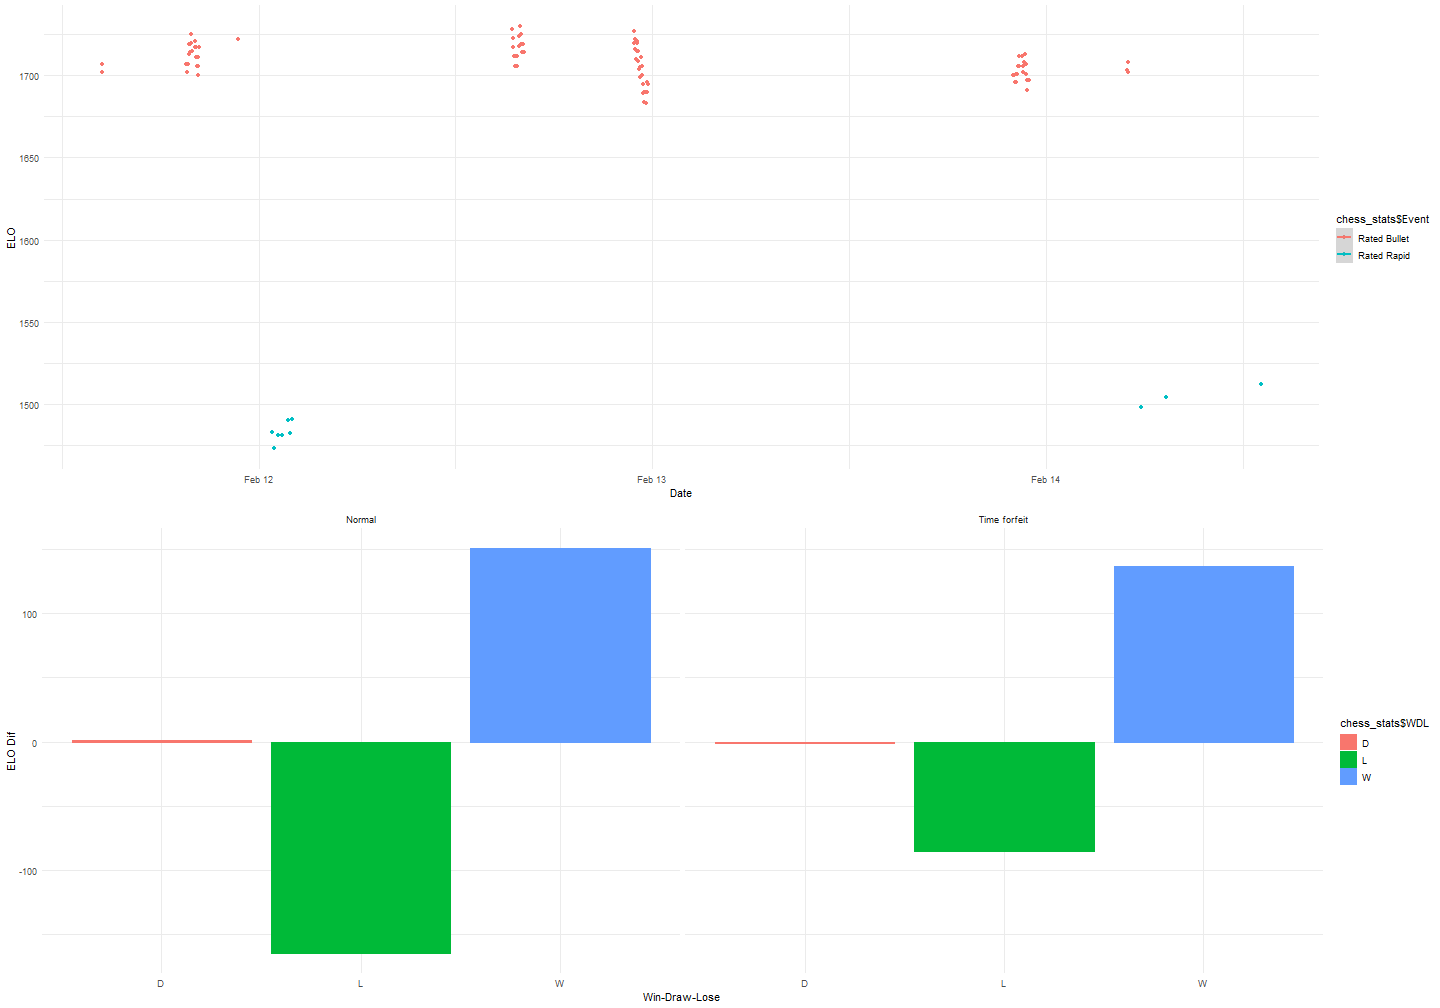

In [11]:
%%R -w 20 -h 14 -u in -i df
library(readr)
library(ggplot2)
library(gridExtra)
chess_stats <- df
g<-ggplot(chess_stats, aes(x=chess_stats$Date, y=chess_stats$ELO,colour=chess_stats$Event)) + 
    geom_point() +
    geom_smooth(method=lm,formula = x~y) +
    theme_minimal() +
    xlab('Date')+
    ylab('ELO')

#g

c<-ggplot(chess_stats, aes(x = chess_stats$WDL, y = chess_stats$EloDif,col=chess_stats$WDL,fill=chess_stats$WDL)) + 
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(chess_stats$Termination))+
    theme_minimal() +
    xlab('Win-Draw-Lose')+
    ylab('ELO Dif')
#c
grid.arrange(g,c)